In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Data cleaning

In [2]:
df = pd.read_csv("raw_data/serie_historica_acumulados.csv", encoding= 'unicode_escape')
df

CCAA      FECHA  CASOS  \
0                                                    AN  20/2/2020    NaN   
1                                                    AR  20/2/2020    NaN   
2                                                    AS  20/2/2020    NaN   
3                                                    IB  20/2/2020    1.0   
4                                                    CN  20/2/2020    1.0   
...                                                 ...        ...    ...   
1312  Los datos de estas comunidades son datos de pr...        NaN    NaN   
1313  * Desde el día 11/04/2020 las cifras de hospit...        NaN    NaN   
1314  * Desde el día 12/04/2020 las cifras de UCIs d...        NaN    NaN   
1315  * Desde el día 26/04/2020 las cifras de Hospit...        NaN    NaN   
1316  NOTA2:Se excluyen de la serie las notificacion...        NaN    NaN   

      PCR+  TestAc+  Hospitalizados  UCI  Fallecidos  Recuperados  
0      NaN      NaN             NaN  NaN         NaN          NaN  
1      NaN      NaN             NaN  NaN         NaN          NaN  
2      NaN      NaN             NaN  NaN         NaN          NaN  
3      NaN      NaN             NaN  NaN         NaN          NaN  
4      NaN      NaN             NaN  NaN         NaN          NaN  
...    ...      ...             ...  ...         ...          ...  
1312   NaN      NaN             NaN  NaN         NaN          NaN  
1313   NaN      NaN             NaN  NaN         NaN          NaN  
1314   NaN      NaN             NaN  NaN         NaN          NaN  
1315   NaN      NaN             NaN  NaN         NaN          NaN  
1316   NaN      NaN             NaN  NaN         NaN          NaN  

[1317 rows x 9 columns]

In [3]:
df.tail(10)

CCAA      FECHA  CASOS  \
1307                                                 MC  28/4/2020    NaN   
1308                                                 NC  28/4/2020    NaN   
1309                                                 PV  28/4/2020    NaN   
1310                                                 RI  28/4/2020    NaN   
1311  NOTA: El objetivo de los datos que se publican...        NaN    NaN   
1312  Los datos de estas comunidades son datos de pr...        NaN    NaN   
1313  * Desde el día 11/04/2020 las cifras de hospit...        NaN    NaN   
1314  * Desde el día 12/04/2020 las cifras de UCIs d...        NaN    NaN   
1315  * Desde el día 26/04/2020 las cifras de Hospit...        NaN    NaN   
1316  NOTA2:Se excluyen de la serie las notificacion...        NaN    NaN   

         PCR+  TestAc+  Hospitalizados    UCI  Fallecidos  Recuperados  
1307   1480.0    360.0           635.0  106.0       130.0       1153.0  
1308   4794.0   1090.0          1951.0  130.0       448.0       2082.0  
1309  12619.0   2519.0          6522.0  540.0      1274.0      10474.0  
1310   3910.0   1263.0          1413.0   87.0       330.0       2091.0  
1311      NaN      NaN             NaN    NaN         NaN          NaN  
1312      NaN      NaN             NaN    NaN         NaN          NaN  
1313      NaN      NaN             NaN    NaN         NaN          NaN  
1314      NaN      NaN             NaN    NaN         NaN          NaN  
1315      NaN      NaN             NaN    NaN         NaN          NaN  
1316      NaN      NaN             NaN    NaN         NaN          NaN

In [4]:
#Drop the comment columns
df = df.drop([1311,1312,1313,1314,1315,1316],axis=0)

In [5]:
df.tail(5)

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
1306   ML  28/4/2020    NaN    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    NaN   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    NaN   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    NaN  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    NaN   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados  
1306         2.0         95.0  
1307       130.0       1153.0  
1308       448.0       2082.0  
1309      1274.0      10474.0  
1310       330.0       2091.0

In [6]:
#Replace all NaN elements with 0s.
df = df.fillna(0)

In [7]:
df.CCAA.value_counts()

MD    69
GA    69
NC    69
EX    69
MC    69
CE    69
CL    69
RI    69
VC    69
AN    69
AS    69
PV    69
CT    69
CB    69
ML    69
CM    69
IB    69
CN    69
AR    69
Name: CCAA, dtype: int64

In [8]:
df.CCAA.value_counts().value_counts()

69    19
Name: CCAA, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CCAA            1311 non-null   object 
 1   FECHA           1311 non-null   object 
 2   CASOS           1311 non-null   float64
 3   PCR+            1311 non-null   float64
 4   TestAc+         1311 non-null   float64
 5   Hospitalizados  1311 non-null   float64
 6   UCI             1311 non-null   float64
 7   Fallecidos      1311 non-null   float64
 8   Recuperados     1311 non-null   float64
dtypes: float64(7), object(2)
memory usage: 102.4+ KB


In [10]:
ccaa = {
    'EX':'Extremadura',
    'MC':'Murcia',
    'NC':'Navarra',
    'AR':'Aragón',
    'RI':'Rioja',
    'CM':'Castilla-La Mancha',
    'AN':'Andalucia',
    'CB':'Cantabria',
    'PV':'País Vasco',
    'MD':'Madrid',
    'CN':'Canarias',
    'IB':'Islas Baleares',
    'AS':'Asturias',
    'CL':'Castilla y León',
    'CT':'Cataluña',
    'ML':'Melilla',
    'GA':'Galicia',
    'CE':'Ceuta',
    'VC':'Valencia',   
}

In [11]:
df_ccaa = pd.DataFrame([[key, ccaa[key]] for key in ccaa.keys()], columns=['abr', 'ccaa'])

In [12]:
df_ccaa = df_ccaa.sort_values('ccaa').reset_index(drop=True)

In [13]:
df_ccaa

abr                ccaa
0   AN           Andalucia
1   AR              Aragón
2   AS            Asturias
3   CN            Canarias
4   CB           Cantabria
5   CL     Castilla y León
6   CM  Castilla-La Mancha
7   CT            Cataluña
8   CE               Ceuta
9   EX         Extremadura
10  GA             Galicia
11  IB      Islas Baleares
12  MD              Madrid
13  ML             Melilla
14  MC              Murcia
15  NC             Navarra
16  PV          País Vasco
17  RI               Rioja
18  VC            Valencia

In [14]:
colors = ['#EF9A9A','#F48FB1','#CE93D8','#B39DDB','#9FA8DA',
          '#90CAF9','#81D4FA','#80DEEA','#80CBC4','#A5D6A7',
          '#C5E1A5','#e6ee9c','#81c784','#ffe082','#ffcc80',
          '#ffab91','#bcaaa4','#b0bec5','#78909c']

In [15]:
df_ccaa["color"] = colors

In [16]:
df_ccaa

abr                ccaa    color
0   AN           Andalucia  #EF9A9A
1   AR              Aragón  #F48FB1
2   AS            Asturias  #CE93D8
3   CN            Canarias  #B39DDB
4   CB           Cantabria  #9FA8DA
5   CL     Castilla y León  #90CAF9
6   CM  Castilla-La Mancha  #81D4FA
7   CT            Cataluña  #80DEEA
8   CE               Ceuta  #80CBC4
9   EX         Extremadura  #A5D6A7
10  GA             Galicia  #C5E1A5
11  IB      Islas Baleares  #e6ee9c
12  MD              Madrid  #81c784
13  ML             Melilla  #ffe082
14  MC              Murcia  #ffcc80
15  NC             Navarra  #ffab91
16  PV          País Vasco  #bcaaa4
17  RI               Rioja  #b0bec5
18  VC            Valencia  #78909c

In [17]:
df

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
0      AN  20/2/2020    0.0      0.0      0.0             0.0    0.0   
1      AR  20/2/2020    0.0      0.0      0.0             0.0    0.0   
2      AS  20/2/2020    0.0      0.0      0.0             0.0    0.0   
3      IB  20/2/2020    1.0      0.0      0.0             0.0    0.0   
4      CN  20/2/2020    1.0      0.0      0.0             0.0    0.0   
...   ...        ...    ...      ...      ...             ...    ...   
1306   ML  28/4/2020    0.0    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    0.0   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    0.0   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    0.0  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    0.0   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados  
0            0.0          0.0  
1            0.0          0.0  
2            0.0          0.0  
3            0.0          0.0  
4            0.0          0.0  
...          ...          ...  
1306         2.0         95.0  
1307       130.0       1153.0  
1308       448.0       2082.0  
1309      1274.0      10474.0  
1310       330.0       2091.0  

[1311 rows x 9 columns]

In [18]:
def giveMeCCAA(df_ccaa, df):
    name_ccaa = []
    color_ccaa = []
    for i in df.CCAA:
        for ind,e in enumerate(df_ccaa.abr):
            if i == e:
                name_ccaa.append(df_ccaa.ccaa[ind])
                color_ccaa.append(df_ccaa.color[ind])
    return name_ccaa, color_ccaa

In [19]:
name_ccaa, color_ccaa = giveMeCCAA(df_ccaa,df)

In [20]:
df["name"] = name_ccaa
df["color"] = color_ccaa

In [21]:
df

CCAA      FECHA  CASOS     PCR+  TestAc+  Hospitalizados    UCI  \
0      AN  20/2/2020    0.0      0.0      0.0             0.0    0.0   
1      AR  20/2/2020    0.0      0.0      0.0             0.0    0.0   
2      AS  20/2/2020    0.0      0.0      0.0             0.0    0.0   
3      IB  20/2/2020    1.0      0.0      0.0             0.0    0.0   
4      CN  20/2/2020    1.0      0.0      0.0             0.0    0.0   
...   ...        ...    ...      ...      ...             ...    ...   
1306   ML  28/4/2020    0.0    114.0     11.0            44.0    3.0   
1307   MC  28/4/2020    0.0   1480.0    360.0           635.0  106.0   
1308   NC  28/4/2020    0.0   4794.0   1090.0          1951.0  130.0   
1309   PV  28/4/2020    0.0  12619.0   2519.0          6522.0  540.0   
1310   RI  28/4/2020    0.0   3910.0   1263.0          1413.0   87.0   

      Fallecidos  Recuperados            name    color  
0            0.0          0.0       Andalucia  #EF9A9A  
1            0.0          0.0          Aragón  #F48FB1  
2            0.0          0.0        Asturias  #CE93D8  
3            0.0          0.0  Islas Baleares  #e6ee9c  
4            0.0          0.0        Canarias  #B39DDB  
...          ...          ...             ...      ...  
1306         2.0         95.0         Melilla  #ffe082  
1307       130.0       1153.0          Murcia  #ffcc80  
1308       448.0       2082.0         Navarra  #ffab91  
1309      1274.0      10474.0      País Vasco  #bcaaa4  
1310       330.0       2091.0           Rioja  #b0bec5  

[1311 rows x 11 columns]

In [22]:
dates = df.FECHA
dates = dates.to_list()

In [23]:
def obtainDate(lst):

    date = []
    for i in lst:
        t = i.split("/")
        for elem in range(2):
            t[elem] = t[elem].zfill(2)
        res=t[2]+"-"+t[1]+"-"+t[0]
        date.append(res)

    return date

In [24]:
new_date = obtainDate(dates)

In [25]:
df['date'] = new_date

In [26]:
dates_sort = df.FECHA.sort_values(ascending=True)
dates_sort = dates_sort.to_list()
dates_sort = list(dict.fromkeys(dates_sort))
dates_sort = sorted(dates_sort)
len(dates_sort)
dates_sort = obtainDate(dates_sort)
dates_sort.sort()
print(len(dates_sort))
print(dates_sort)

69
['2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28']


In [27]:
col_order = ['date','name','color','CASOS','PCR+','TestAc+','Hospitalizados','UCI','Fallecidos','Recuperados']
df_clean = df[col_order]

In [28]:
df_clean

date            name    color  CASOS     PCR+  TestAc+  \
0     2020-02-20       Andalucia  #EF9A9A    0.0      0.0      0.0   
1     2020-02-20          Aragón  #F48FB1    0.0      0.0      0.0   
2     2020-02-20        Asturias  #CE93D8    0.0      0.0      0.0   
3     2020-02-20  Islas Baleares  #e6ee9c    1.0      0.0      0.0   
4     2020-02-20        Canarias  #B39DDB    1.0      0.0      0.0   
...          ...             ...      ...    ...      ...      ...   
1306  2020-04-28         Melilla  #ffe082    0.0    114.0     11.0   
1307  2020-04-28          Murcia  #ffcc80    0.0   1480.0    360.0   
1308  2020-04-28         Navarra  #ffab91    0.0   4794.0   1090.0   
1309  2020-04-28      País Vasco  #bcaaa4    0.0  12619.0   2519.0   
1310  2020-04-28           Rioja  #b0bec5    0.0   3910.0   1263.0   

      Hospitalizados    UCI  Fallecidos  Recuperados  
0                0.0    0.0         0.0          0.0  
1                0.0    0.0         0.0          0.0  
2                0.0    0.0         0.0          0.0  
3                0.0    0.0         0.0          0.0  
4                0.0    0.0         0.0          0.0  
...              ...    ...         ...          ...  
1306            44.0    3.0         2.0         95.0  
1307           635.0  106.0       130.0       1153.0  
1308          1951.0  130.0       448.0       2082.0  
1309          6522.0  540.0      1274.0      10474.0  
1310          1413.0   87.0       330.0       2091.0  

[1311 rows x 10 columns]

# Figure
## Draw bar chart function

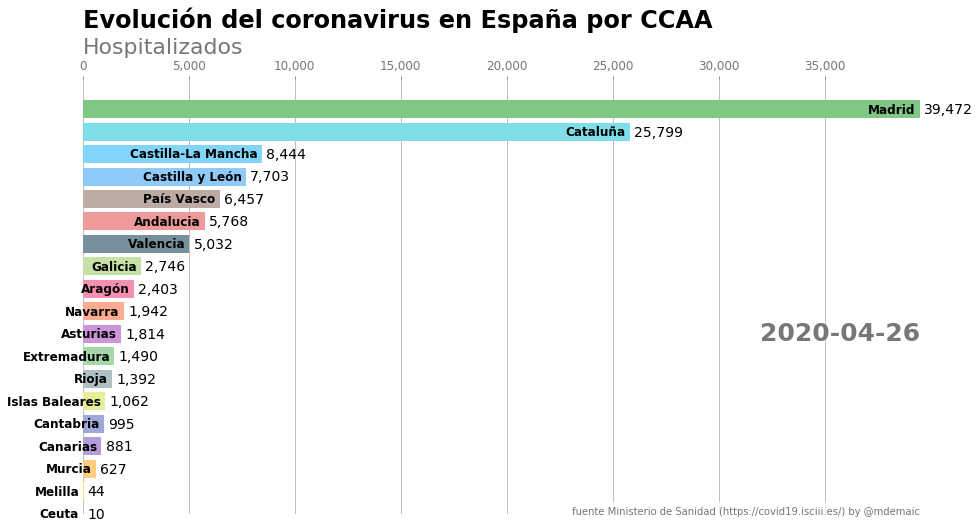

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(date,df,col):
    
    dff = df[df['date'].eq(date)].sort_values(by=col, ascending=True).tail(19)
    ax.clear()
    ax.barh(dff['name'], dff[col], color=dff['color'])
    dx = dff[col].max() / 200
    
    for i, (value, name) in enumerate(zip(dff[col], dff['name'])):
        ax.text(value-dx, i,     name,           size=12, weight=600, ha='right', va='center')
        ax.text(value+dx, i,     f"{value:,.0f}",  size=14, ha='left',  va='center')
    
    # ... polished styles
    ax.set_ylim(bottom=0)
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=25, ha='right', weight=800)
    ax.text(0, 1.06, col, transform=ax.transAxes, size=22, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Evolución del coronavirus en España por CCAA',
            transform=ax.transAxes, size=24, weight=700, ha='left')
    ax.text(1, 0, 'fuente Ministerio de Sanidad (https://covid19.isciii.es/) by @mdemaic', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('2020-04-26',df_clean,'Hospitalizados')
      

def draw_barchart_Casos(date):
    draw_barchart(date,df_clean,"CASOS")
    
def draw_barchart_PCR(date):
    draw_barchart(date,df_clean,"PCR+")

def draw_barchart_TestAc(date):
    draw_barchart(date,df_clean,"TestAc+")
    
def draw_barchart_Hospitalizados(date):
    draw_barchart(date,df_clean,"Hospitalizados")
    
def draw_barchart_UCI(date):
    draw_barchart(date,df_clean,"UCI")
    
def draw_barchart_Fallecidos(date):
    draw_barchart(date,df_clean,"Fallecidos")
    
def draw_barchart_Recuperados(date):
    draw_barchart(date,df_clean,"Recuperados")


In [41]:
def draw_animation(func):
    return animation.FuncAnimation(fig, func, frames=dates_sort)

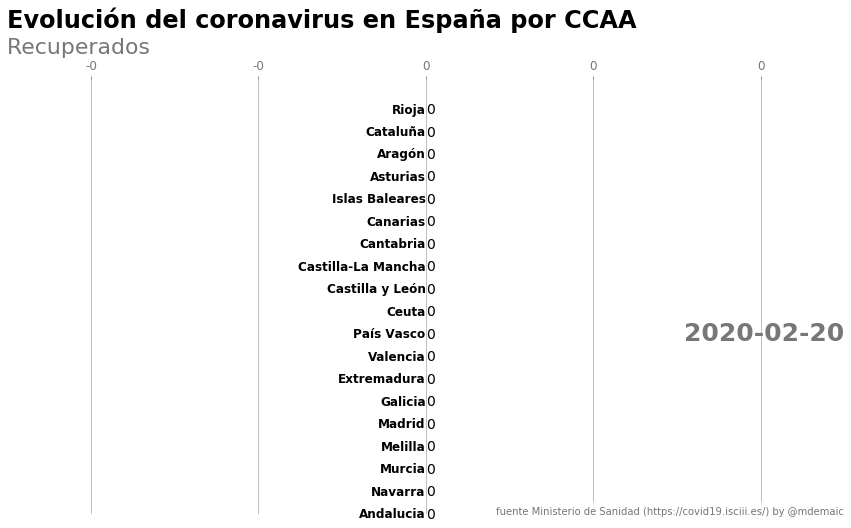

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = draw_animation(draw_barchart_Recuperados)
HTML(animator.to_jshtml())

In [32]:
df_clean_Madrid = df_clean[df_clean.name == "Madrid"]

In [33]:
df_clean_Madrid.tail(20)

date    name    color    CASOS     PCR+  TestAc+  Hospitalizados  \
944   2020-04-09  Madrid  #81c784  44783.0      0.0      0.0         12432.0   
963   2020-04-10  Madrid  #81c784  45849.0      0.0      0.0         11894.0   
982   2020-04-11  Madrid  #81c784  46587.0      0.0      0.0         11424.0   
1001  2020-04-12  Madrid  #81c784  47146.0      0.0      0.0         11233.0   
1020  2020-04-13  Madrid  #81c784  48048.0      0.0      0.0         10753.0   
1039  2020-04-14  Madrid  #81c784  49526.0      0.0      0.0         10116.0   
1058  2020-04-15  Madrid  #81c784  50694.0      0.0      0.0          9653.0   
1077  2020-04-16  Madrid  #81c784  51993.0      0.0      0.0          9141.0   
1096  2020-04-17  Madrid  #81c784      0.0  52946.0      0.0          8597.0   
1115  2020-04-18  Madrid  #81c784      0.0  53670.0   2475.0          8291.0   
1134  2020-04-19  Madrid  #81c784      0.0  54300.0   2663.0          8191.0   
1153  2020-04-20  Madrid  #81c784      0.0  55325.0   2672.0          7930.0   
1172  2020-04-21  Madrid  #81c784      0.0  56245.0   2954.0          7464.0   
1191  2020-04-22  Madrid  #81c784      0.0  57094.0   3393.0          7077.0   
1210  2020-04-23  Madrid  #81c784      0.0  58191.0   3535.0          6601.0   
1229  2020-04-24  Madrid  #81c784      0.0  58819.0   3691.0          6183.0   
1248  2020-04-25  Madrid  #81c784      0.0  59126.0   3691.0          5892.0   
1267  2020-04-26  Madrid  #81c784      0.0  59421.0   4022.0         39472.0   
1286  2020-04-27  Madrid  #81c784      0.0  59784.0   4205.0         39634.0   
1305  2020-04-28  Madrid  #81c784      0.0  60765.0   4381.0         39850.0   

         UCI  Fallecidos  Recuperados  
944   1399.0      5972.0      22414.0  
963   1376.0      6084.0      23663.0  
982   1332.0      6278.0      24683.0  
1001  1327.0      6423.0      25385.0  
1020  1299.0      6568.0      26247.0  
1039  1244.0      6724.0      27433.0  
1058  1206.0      6877.0      28491.0  
1077  1154.0      7007.0      29436.0  
1096  1094.0      7132.0      30475.0  
1115  1123.0      7239.0      31313.0  
1134  1111.0      7351.0      31762.0  
1153  1076.0      7460.0      32277.0  
1172  1024.0      7577.0      33032.0  
1191   981.0      7684.0      33645.0  
1210   949.0      7765.0      34212.0  
1229   892.0      7848.0      34902.0  
1248   873.0      7922.0      35367.0  
1267  3309.0      7986.0      35565.0  
1286  3338.0      8048.0      35841.0  
1305  3355.0      8105.0      36314.0

In [34]:
col_Casos = ['date','name','CASOS']
col_PCR = ['date','name','PCR+']
col_TestAc = ['date','name','TestAc+']
col_Hospitalizados = ['date','name','Hospitalizados']
col_UCI = ['date','name','UCI']
col_Fallecidos = ['date','name','Fallecidos']
col_Recuperados = ['date','name','Recuperados']

df_Casos = df[col_Casos]
df_PCR = df[col_PCR]
df_TestAc = df[col_TestAc]
df_Hospitalizados = df[col_Hospitalizados]
df_UCI = df[col_UCI]
df_Fallecidos = df[col_Fallecidos]
df_Recuperados = df[col_Recuperados]

In [35]:
df_Casos

date            name  CASOS
0     2020-02-20       Andalucia    0.0
1     2020-02-20          Aragón    0.0
2     2020-02-20        Asturias    0.0
3     2020-02-20  Islas Baleares    1.0
4     2020-02-20        Canarias    1.0
...          ...             ...    ...
1306  2020-04-28         Melilla    0.0
1307  2020-04-28          Murcia    0.0
1308  2020-04-28         Navarra    0.0
1309  2020-04-28      País Vasco    0.0
1310  2020-04-28           Rioja    0.0

[1311 rows x 3 columns]

In [36]:
df_Casos_20abr = df_Casos[df_Casos.date == "2020-04-20"]

In [37]:
df_Casos_20abr

date                name   CASOS
1140  2020-04-20           Andalucia     0.0
1141  2020-04-20              Aragón     0.0
1142  2020-04-20            Asturias     0.0
1143  2020-04-20      Islas Baleares     0.0
1144  2020-04-20            Canarias     0.0
1145  2020-04-20           Cantabria     0.0
1146  2020-04-20  Castilla-La Mancha     0.0
1147  2020-04-20     Castilla y León     0.0
1148  2020-04-20            Cataluña     0.0
1149  2020-04-20               Ceuta     0.0
1150  2020-04-20            Valencia     0.0
1151  2020-04-20         Extremadura     0.0
1152  2020-04-20             Galicia  8468.0
1153  2020-04-20              Madrid     0.0
1154  2020-04-20             Melilla     0.0
1155  2020-04-20              Murcia     0.0
1156  2020-04-20             Navarra     0.0
1157  2020-04-20          País Vasco     0.0
1158  2020-04-20               Rioja     0.0

In [38]:
Casos = pd.pivot_table(df_Casos, values='CASOS', index='date',
                    columns=['name'], aggfunc=np.sum, fill_value=0)

In [39]:
Casos

name        Andalucia  Aragón  Asturias  Canarias  Cantabria  Castilla y León  \
date                                                                            
2020-02-20          0       0         0         1          0                0   
2020-02-21          0       0         0         1          0                0   
2020-02-22          0       0         0         1          0                0   
2020-02-23          0       0         0         1          0                0   
2020-02-24          0       0         0         2          0                0   
...               ...     ...       ...       ...        ...              ...   
2020-04-24          0       0         0         0          0                0   
2020-04-25          0       0         0         0          0                0   
2020-04-26          0       0         0         0          0                0   
2020-04-27          0       0         0         0          0                0   
2020-04-28          0       0         0         0          0                0   

name        Castilla-La Mancha  Cataluña  Ceuta  Extremadura  Galicia  \
date                                                                    
2020-02-20                   0         0      0            0        0   
2020-02-21                   0         0      0            0        0   
2020-02-22                   0         0      0            0        0   
2020-02-23                   0         0      0            0        0   
2020-02-24                   0         0      0            0        0   
...                        ...       ...    ...          ...      ...   
2020-04-24                   0         0      0            0     9116   
2020-04-25                   0         0      0            0     9176   
2020-04-26                   0         0      0            0     9238   
2020-04-27                   0         0      0            0     9328   
2020-04-28                   0         0      0            0     9466   

name        Islas Baleares  Madrid  Melilla  Murcia  Navarra  País Vasco  \
date                                                                       
2020-02-20               1       0        0       0        0           0   
2020-02-21               1       0        0       0        0           0   
2020-02-22               1       0        0       0        0           0   
2020-02-23               1       0        0       0        0           0   
2020-02-24               1       0        0       0        0           0   
...                    ...     ...      ...     ...      ...         ...   
2020-04-24               0       0        0       0        0           0   
2020-04-25               0       0        0       0        0           0   
2020-04-26               0       0        0       0        0           0   
2020-04-27               0       0        0       0        0           0   
2020-04-28               0       0        0       0        0           0   

name        Rioja  Valencia  
date                         
2020-02-20      0         0  
2020-02-21      0         0  
2020-02-22      0         0  
2020-02-23      0         0  
2020-02-24      0         0  
...           ...       ...  
2020-04-24      0         0  
2020-04-25      0         0  
2020-04-26      0         0  
2020-04-27      0         0  
2020-04-28      0         0  

[69 rows x 19 columns]